# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from pprint import pprint
#regressions
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
cities[0:5]

['gobabis', 'mataura', 'rawson', 'zhigansk', 'vardo']

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

In [6]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_response.status_code)

200


In [7]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 30.4833, 'lon': -115.95},
 'dt': 1647417059,
 'id': 3984997,
 'main': {'feels_like': 57.9,
          'grnd_level': 1016,
          'humidity': 91,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 58.12,
          'temp_max': 58.12,
          'temp_min': 58.12},
 'name': 'San Quintín',
 'sys': {'country': 'MX', 'sunrise': 1647438746, 'sunset': 1647481946},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 317, 'gust': 16.73, 'speed': 10.92}}


In [8]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
#create data variables based off keys


city = weather_json['name']
country = weather_json['sys']['country']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
day_date = weather_json['dt']
humidity = weather_json['main']['humidity']
max_temp = weather_json['main']['temp_max']
wind_speed = weather_json['wind']['speed']
cloudiness = weather_json['clouds']['all']

In [10]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
city_names = []
wind_speeds = []
max_temps = []
humids = []


for city in cities[0:618]:
    #Make Request
    print(city)
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(weather_response.status_code)
    print()
    
    
    if(weather_response.status_code) == 200:
        
    
        #parse the data
        city = weather_json['name']
        country = weather_json['sys']['country']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']

        day_date = weather_json['dt']


        humidity = weather_json['main']['humidity']
        max_temp = weather_json['main']['temp_max']
        wind_speed = weather_json['wind']['speed']
        cloudiness = weather_json['clouds']['all']

        #Place into list
        city_names.append(city)
        countries.append(country)
        lats.append(lat)
        lngs.append(lng)
        dates.append(day_date)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        max_temps.append(max_temp)
        humids.append(humidity)
        
        
        
    else:
        
        city_names.append(np.nan)
        countries.append(np.nan)
        lats.append(np.nan)
        lngs.append(np.nan)
        dates.append(np.nan)
        clouds.append(np.nan)
        wind_speeds.append(np.nan)
        max_temps.append(np.nan)
        humids.append(np.nan)

    
    time.sleep(1)
    
    
    print('All Done!')

gobabis
200

All Done!
mataura
200

All Done!
rawson
200

All Done!
zhigansk
200

All Done!
vardo
200

All Done!
saldanha
200

All Done!
hobart
200

All Done!
hami
200

All Done!
dolgoderevenskoye
200

All Done!
baruun-urt
200

All Done!
cabo san lucas
200

All Done!
mar del plata
200

All Done!
hilo
200

All Done!
conceicao da barra
200

All Done!
rikitea
200

All Done!
tucuman
200

All Done!
merauke
200

All Done!
thompson
200

All Done!
kaitangata
200

All Done!
port lincoln
200

All Done!
castro
200

All Done!
ushuaia
200

All Done!
tromso
200

All Done!
barvinkove
200

All Done!
fanai
200

All Done!
antalaha
200

All Done!
cape town
200

All Done!
myitkyina
200

All Done!
lompoc
200

All Done!
batagay-alyta
200

All Done!
jamestown
200

All Done!
bubaque
200

All Done!
chuy
200

All Done!
albany
200

All Done!
izvoarele
200

All Done!
bluff
200

All Done!
mildura
200

All Done!
biak
200

All Done!
leningradskiy
200

All Done!
bethel
200

All Done!
kendari
200

All Done!
avarua
200

All Done!
mazagao
200

All Done!
alice springs
200

All Done!
toliary
404

All Done!
bichena
200

All Done!
kaka
200

All Done!
sabang
200

All Done!
sentyabrskiy
404

All Done!
basco
200

All Done!
laela
200

All Done!
airai
200

All Done!
tsihombe
404

All Done!
morant bay
200

All Done!
varkkallai
200

All Done!
komsomolskiy
200

All Done!
bull savanna
200

All Done!
villa literno
200

All Done!
rundu
200

All Done!
aklavik
200

All Done!
lugovskiy
404

All Done!
edd
200

All Done!
awjilah
200

All Done!
bronnoysund
200

All Done!
jasper
200

All Done!
puerto el triunfo
200

All Done!
nioki
200

All Done!
san cristobal
200

All Done!
kieta
200

All Done!
saint anthony
200

All Done!
babai
200

All Done!
mount gambier
200

All Done!
libreville
200

All Done!
erode
200

All Done!
iralaya
200

All Done!
quang ngai
200

All Done!
tomari
200

All Done!
miraflores
200

All Done!
palabuhanratu
404

All Done!
paamiut
200

All Done!
rocha
200

All Done!
buala
200

All Done!
nalut
200

All Do

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df = pd.DataFrame()

df["City"] = city_names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Date"] = dates
df["Wind_Speed"] = wind_speeds
df["Humidity"] = humids
df["Max_Temp"] = max_temps
df["Cloudiness"] = clouds

df

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Gobabis,NA,-22.4500,18.9667,1.647417e+09,5.28,31.0,69.91,19.0
1,Mataura,NZ,-46.1927,168.8643,1.647417e+09,5.14,85.0,51.48,93.0
2,Rawson,AR,-43.3002,-65.1023,1.647417e+09,9.13,36.0,69.42,0.0
3,Zhigansk,RU,66.7697,123.3711,1.647417e+09,10.42,95.0,-1.73,100.0
4,Vardø,NO,70.3705,31.1107,1.647417e+09,27.63,86.0,26.58,0.0
...,...,...,...,...,...,...,...,...,...
395,Pisco,PE,-13.7000,-76.2167,1.647418e+09,2.98,85.0,69.39,2.0
396,Semīrom,IR,31.4167,51.5667,1.647418e+09,3.60,98.0,35.38,100.0
397,Huarmey,PE,-10.0681,-78.1522,1.647418e+09,6.40,78.0,71.71,15.0
398,Miquelon,PM,47.0975,-56.3814,1.647418e+09,15.41,59.0,23.79,71.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        366 non-null    object 
 1   Country     366 non-null    object 
 2   Latitude    366 non-null    float64
 3   Longitude   366 non-null    float64
 4   Date        366 non-null    float64
 5   Wind_Speed  366 non-null    float64
 6   Humidity    366 non-null    float64
 7   Max_Temp    366 non-null    float64
 8   Cloudiness  366 non-null    float64
dtypes: float64(7), object(2)
memory usage: 28.2+ KB


In [15]:
#Clean dataframe to remove cities that were not found or had missing data that coused our row to go nan
df = df.dropna()



In [16]:
non_nan_df = df
non_nan_df.head(292)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Gobabis,NA,-22.4500,18.9667,1.647417e+09,5.28,31.0,69.91,19.0
1,Mataura,NZ,-46.1927,168.8643,1.647417e+09,5.14,85.0,51.48,93.0
2,Rawson,AR,-43.3002,-65.1023,1.647417e+09,9.13,36.0,69.42,0.0
3,Zhigansk,RU,66.7697,123.3711,1.647417e+09,10.42,95.0,-1.73,100.0
4,Vardø,NO,70.3705,31.1107,1.647417e+09,27.63,86.0,26.58,0.0
...,...,...,...,...,...,...,...,...,...
311,Baharly,TM,38.4362,57.4316,1.647418e+09,2.64,84.0,45.84,100.0
312,Port Augusta,AU,-32.5000,137.7667,1.647418e+09,21.68,67.0,76.06,100.0
313,Nosy Varika,MG,-20.5833,48.5333,1.647418e+09,5.28,71.0,82.69,45.0
315,Burlington,US,39.8835,-74.6413,1.647417e+09,5.75,72.0,51.78,0.0


In [17]:
non_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        366 non-null    object 
 1   Country     366 non-null    object 
 2   Latitude    366 non-null    float64
 3   Longitude   366 non-null    float64
 4   Date        366 non-null    float64
 5   Wind_Speed  366 non-null    float64
 6   Humidity    366 non-null    float64
 7   Max_Temp    366 non-null    float64
 8   Cloudiness  366 non-null    float64
dtypes: float64(7), object(2)
memory usage: 28.6+ KB


In [18]:
#Save dataframe
non_nan_df.to_csv("Output/CityWeatherData.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
df.Humidity.max()

100.0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

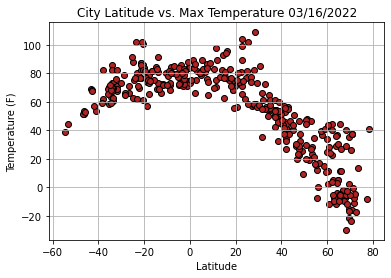

In [20]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Max_Temp"], edgecolors="black",facecolors="firebrick")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City.Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

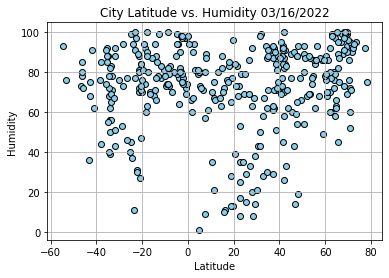

In [21]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Humidity"], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City.Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

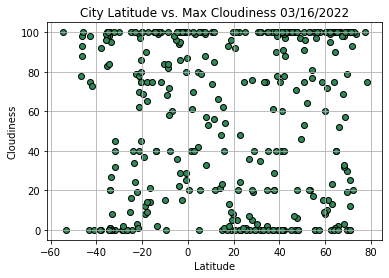

In [22]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Cloudiness"], edgecolors="black",facecolors="seagreen")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

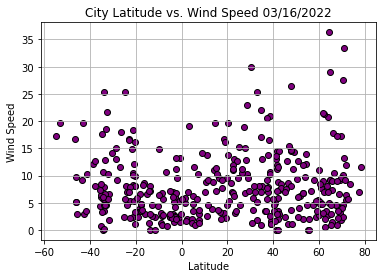

In [23]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Wind_Speed"], edgecolors="black",facecolors="purple")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [24]:
#create a Northern Hemisphere dataframe
mask = df.Latitude >= 0
north = df.loc[mask]
north

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
3,Zhigansk,RU,66.7697,123.3711,1.647417e+09,10.42,95.0,-1.73,100.0
4,Vardø,NO,70.3705,31.1107,1.647417e+09,27.63,86.0,26.58,0.0
7,Kumul,CN,42.8000,93.4500,1.647417e+09,7.25,33.0,56.23,100.0
8,Dolgoderevenskoye,RU,55.3444,61.3444,1.647417e+09,0.00,62.0,12.54,0.0
9,Baruun-Urt,MN,46.6806,113.2792,1.647417e+09,8.61,14.0,19.76,0.0
...,...,...,...,...,...,...,...,...,...
392,Kuliyapitiya,LK,7.4688,80.0401,1.647418e+09,3.69,57.0,83.88,100.0
394,Norman Wells,CA,65.2820,-126.8329,1.647418e+09,2.89,100.0,-9.74,100.0
396,Semīrom,IR,31.4167,51.5667,1.647418e+09,3.60,98.0,35.38,100.0
398,Miquelon,PM,47.0975,-56.3814,1.647418e+09,15.41,59.0,23.79,71.0


In [25]:
#create a Southern Hemisphere dataframe
mask = df.Latitude < 0
south = df.loc[mask]
south

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Gobabis,NA,-22.4500,18.9667,1.647417e+09,5.28,31.0,69.91,19.0
1,Mataura,NZ,-46.1927,168.8643,1.647417e+09,5.14,85.0,51.48,93.0
2,Rawson,AR,-43.3002,-65.1023,1.647417e+09,9.13,36.0,69.42,0.0
5,Saldanha,ZA,-33.0117,17.9442,1.647417e+09,18.52,71.0,68.05,8.0
6,Hobart,AU,-42.8794,147.3294,1.647417e+09,19.57,75.0,68.25,75.0
...,...,...,...,...,...,...,...,...,...
387,Isangel,VU,-19.5500,169.2667,1.647418e+09,5.91,81.0,81.68,69.0
388,Katima Mulilo,NA,-17.5000,24.2667,1.647418e+09,3.65,80.0,74.41,100.0
393,Murray Bridge,AU,-35.1167,139.2667,1.647418e+09,8.41,55.0,71.82,100.0
395,Pisco,PE,-13.7000,-76.2167,1.647418e+09,2.98,85.0,69.39,2.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

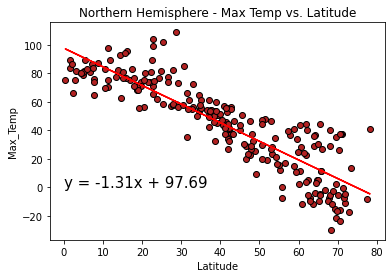

In [26]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="firebrick")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.savefig("Output/Northern Hemisphere Latitude vs. Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

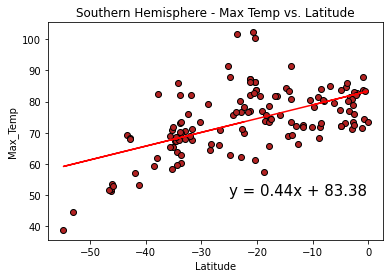

In [27]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="firebrick")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq,(-25,50),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.savefig("Output/Southern Hemisphere Latitude vs. Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

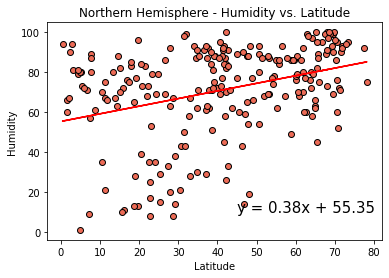

In [28]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black", color="#EC6B56")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.annotate(line_eq,(45,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Output/Northern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

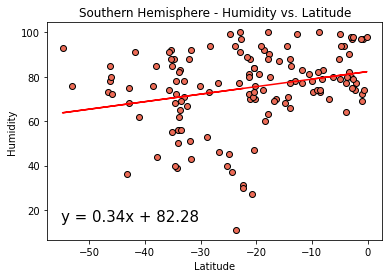

In [29]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black", color="#EC6B56")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.annotate(line_eq,(-55,15),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

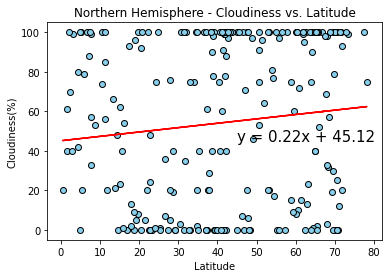

In [30]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="skyblue")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.annotate(line_eq,(45,45),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("Output/Northern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

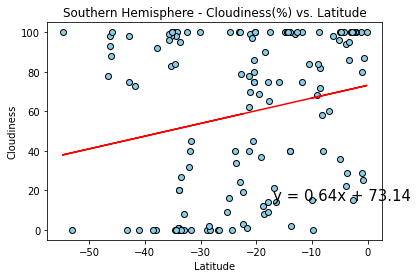

In [31]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="skyblue")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude')
plt.annotate(line_eq,(-17,15),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

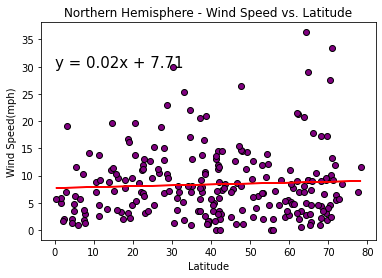

In [32]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="purple")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("Output/Northern Hemisphere Latitude vs. Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

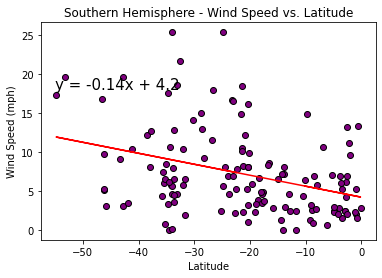

In [33]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="purple")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(line_eq,(-55,18),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Wind Speed.png")
plt.show()